<a href="https://colab.research.google.com/github/ifs99/rl-model/blob/main/Modelado_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definición del Problema

----

## Título:

Modelado y Validación de la Extensión de un Resorte Usando Regresión Lineal

## Descripción:
En esta práctica, se analiza el comportamiento de un resorte al colgar pelotas de diferentes pesos. Usando datos simulados basados en la ley de Hooke, se construye un modelo de regresión lineal para predecir la extensión del resorte en función del peso de las pelotas. Los resultados del modelo se comparan con la ecuación teórica para validar su precisión.

## Objetivos:

Construir un modelo de regresión lineal y evaluar su desempeño.
Comparar los resultados del modelo con valores calculados mediante la fórmula teórica $y = \frac{mg}{k}$ donde:

- y: Elongación
- m: masa del objeto (x)
- k:  constante de elacticidad (50)
- g: gravedad (9.8m/s*s)


# [DataSet](https://drive.google.com/file/d/1eAU1cyAhfVyfq807vkz6jYnZ_KTMBy2Q/view?usp=sharing)



# 1. Recolección de Datos

----


## Nota: La etapa de Exploración y Análisis de Datos (EDA) se omite, ya que los datos están previamente preparados para este experimento.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np


files = files.upload()

file_path = list(files.keys())[0]
data = pd.read_csv(file_path)

print(data.head())

X = data['Peso (kg)'].values.reshape(-1, 1)  # Variable independiente
Y = data['Extension del resorte (m)'].values  # Variable dependiente




print("X (Peso):\n", X[:5])  # Mostrar los primeros 5 valores de X
print("Y (Extensión):\n", Y[:5])  # Mostrar los primeros 5 valores de Y


Saving peso_extension_resorte.csv to peso_extension_resorte.csv
   Peso (kg)  Extension del resorte (m)
0   1.935247                   0.381085
1   4.758500                   0.919313
2   3.686770                   0.726409
3   3.033427                   0.600657
4   0.864491                   0.175038
X (Peso):
 [[1.93524658]
 [4.7585001 ]
 [3.68677031]
 [3.03342657]
 [0.86449134]]
Y (Extensión):
 [0.38108534 0.91931258 0.72640896 0.60065747 0.17503821]


Matriz de correlación:
 [[1.         0.99937868]
 [0.99937868 1.        ]]


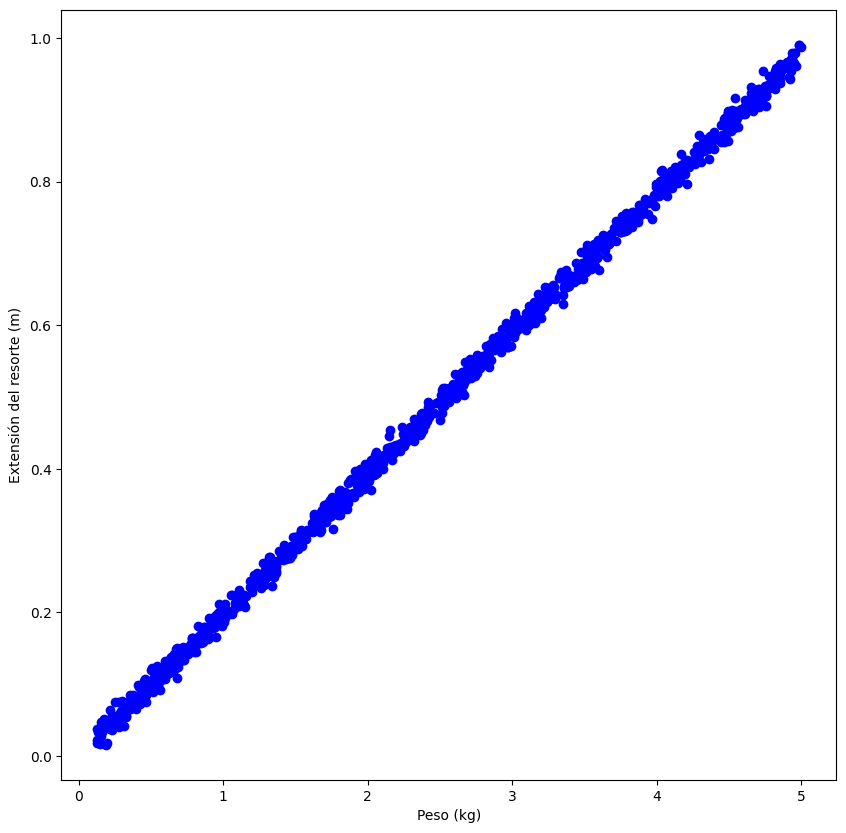

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = np.corrcoef(X.flatten(), Y)
print("Matriz de correlación:\n", correlation_matrix)

plt.figure(figsize=(10, 10))
plt.scatter(X, Y, color="blue", label="Datos reales")
plt.xlabel("Peso (kg)")
plt.ylabel("Extensión del resorte (m)")
plt.show()



# 5 y 6  Selección del Modelo y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


# 7  Evaluación del Modelo

In [ ]:

# Calcular métricas de evaluación
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Resultados
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)
print("*****************************")
print("parámetros del modelo")
print("Coeficiente de regresión:", model.coef_[0])
print("Intercepto:", model.intercept_)




Error cuadrático medio (MSE): 9.036491176656873e-05
Coeficiente de determinación (R2): 0.9988292313056353
*****************************
parámetros del modelo
Coeficiente de regresión: 0.19563997002305158
Intercepto: 0.0021139119056067246


# Visualización de Resultados

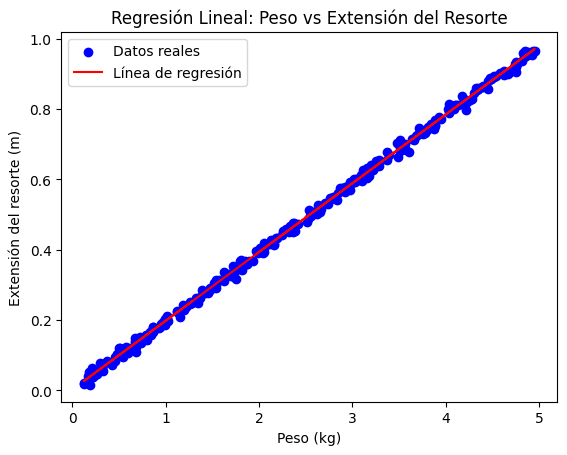

In [ ]:
# Visualización
plt.scatter(X_test, Y_test, color="blue", label="Datos reales")
plt.plot(X_test, Y_pred, color="red", label="Línea de regresión")
plt.xlabel("Peso (kg)")
plt.ylabel("Extensión del resorte (m)")
plt.title("Regresión Lineal: Peso vs Extensión del Resorte")
plt.legend()
plt.show()


   Peso (kg)  Extensión Teórica (m)  Extensión Predicha (m)  Diferencia (m)
0   1.966365               0.385408                0.386814        0.001406
1   4.101337               0.803862                0.804499        0.000637
2   2.367131               0.463958                0.465219        0.001262
3   1.844874               0.361595                0.363045        0.001450
4   4.755304               0.932040                0.932441        0.000402

Error cuadrático medio (MSE) entre teoría y predicción: 1.7849545694261513e-06


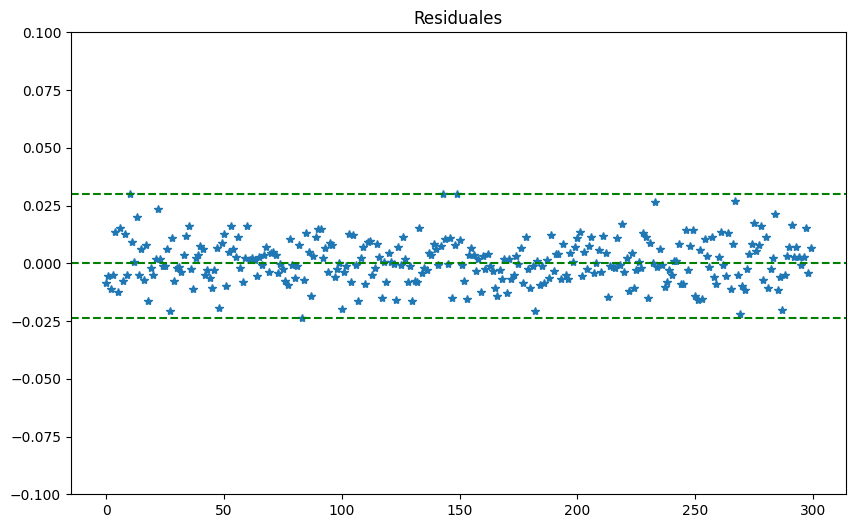

valor mediod e residuales : 0.0007468871867755076
std : 0.00947665928989743


In [ ]:
import numpy as np
# Constantes
g = 9.8  # Gravedad (m/s^2)
k = 50   # Constante elástica del resorte (N/m)

# Extensiones teóricas
extensions_theoretical = X_test.flatten() * g / k

# Comparación con predicciones del modelo
comparison = pd.DataFrame({
    "Peso (kg)": X_test.flatten(),
    "Extensión Teórica (m)": extensions_theoretical,
    "Extensión Predicha (m)": Y_pred,
    "Diferencia (m)": np.abs(extensions_theoretical - Y_pred)
})

# Mostrar las primeras filas de la comparación
print(comparison.head())

# Métrica de error para las predicciones vs valores teóricos
mse_theoretical = mean_squared_error(extensions_theoretical, Y_pred)
print("\nError cuadrático medio (MSE) entre teoría y predicción:", mse_theoretical)


residuales = Y_pred - Y_test
plt.figure(figsize=(10, 6))
plt.plot(residuales,'*')
plt.axhline(residuales.max(), color="green", linestyle="--", label="y = 0")
plt.axhline(0, color="green", linestyle="--", label="y = 0")
plt.axhline(residuales.min(), color="green", linestyle="--", label="y = 0")

plt.ylim(-0.1, 0.1)
plt.title("Residuales")
plt.show()
print("valor mediod e residuales :" , residuales.mean())
print("std :" , residuales.std())

